In [1]:
import sys
sys.path.append('..')
from configure.settings import DBSelector
from common.DataFetch import DataFetcher
import pandas as pd
import re

In [2]:
doc_name = 'bond_top_10_holding_2022-05-02'
client = DBSelector().mongo('qq')
doc = client['db_stock'][doc_name]

In [3]:
result =[]
for item in doc.find({}):
    del item['_id']
    result.append(item)

In [4]:
df = pd.DataFrame(result)

In [5]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime
0,113548,中国工商银行股份有限公司-中海环保新能源主题灵活配置混合型证券投资基金,26.06万,2021-12-31,21.68,2022-05-02 21:42:58.946
1,113548,中国工商银行股份有限公司-广发可转债债券型发起式证券投资基金,12.01万,2021-12-31,10.00,2022-05-02 21:42:58.946
2,113548,中国工商银行股份有限公司-博时精选混合型证券投资基金,11.88万,2021-12-31,9.89,2022-05-02 21:42:58.946
3,113548,中国农业银行股份有限公司-前海开源可转债债券型发起式证券投资基金,5.40万,2021-12-31,4.49,2022-05-02 21:42:58.946
4,113548,中国农业银行股份有限公司-银河稳健证券投资基金,4.80万,2021-12-31,3.99,2022-05-02 21:42:58.946


In [7]:
df['update_date'].value_counts()

2021-12-31    3583
2022-04-21      20
2022-04-01      20
2022-01-20      20
2022-01-17      20
2022-04-07      20
2022-03-22      20
2022-03-23      10
2021-06-30      10
2022-04-20      10
2022-01-06      10
2022-04-08      10
2022-01-26      10
2022-03-03      10
2022-02-21      10
2022-04-18      10
2022-03-21      10
2022-01-21      10
2022-03-29      10
2022-02-14      10
2022-02-28      10
2022-04-22      10
2022-03-30      10
2022-02-22      10
2022-04-14      10
2022-04-13      10
2022-02-16      10
2022-04-26      10
2022-03-18      10
2022-03-01      10
2022-04-25      10
2022-04-11      10
2022-01-13      10
2022-03-09      10
2022-01-19      10
2022-03-17      10
2022-04-19      10
2022-01-18      10
Name: update_date, dtype: int64

In [30]:
less_report = df[df['update_date']<'2021-12-31']

In [8]:
codes_list = []
for code ,sub_df in less_report.groupby('code'):
    codes_list.append({'code':code,'name':code_name_mapper.get(code),'update_date':sub_df.iloc[0]['update_date']})

NameError: name 'less_report' is not defined

In [32]:
not_release = pd.DataFrame(codes_list) # 为发年报

In [28]:
not_release.head()

,code,name,update_date
0,110038,济川转债,2021-06-30
1,110043,无锡转债,2021-06-30
2,110044,广电转债,2021-06-30
3,110045,海澜转债,2021-06-30
4,110047,山鹰转债,2021-06-30


In [34]:
not_release.to_excel('not_release_annual_year_report.xlsx',encoding='utf8')

In [35]:
len(not_release)

258

In [6]:
result_item = {}
for code,sub_df in df.groupby('code'):
#     print(code)
    for date,sub_x in sub_df.groupby('update_date'):
        result_item[code+'_'+date]=sub_x['name'].tolist()

In [ ]:
result_item

In [10]:
counter ={}
for k,v in result_item.items():
    for i in v:
        counter.setdefault(i,0)
        counter[i]+=1

In [11]:
holding_list = list(sorted(counter.items(),key=lambda x:x[1],reverse=True))

In [1]:
holding_list[:20]

NameError: name 'holding_list' is not defined

In [23]:
len(result_item)

375

In [ ]:
holding_list

In [ ]:
for i in holding_list:
    if len(i[0])<5:
        print(i)

In [ ]:
for i in holding_list:
    if len(i[0])>3:
        print(i)

In [14]:
df[df['code']=='123015']

,code,name,amount,update_date,holding_ratio,crawltime
3851,123015,陈玲玲,1.37万,2021-06-30,1.36,2022-04-02 00:03:40.217
3852,123015,肖志章,1.02万,2021-06-30,1.02,2022-04-02 00:03:40.217
3853,123015,郭丽霞,8100.00,2021-06-30,0.81,2022-04-02 00:03:40.217
3854,123015,岑斌辉,6470.00,2021-06-30,0.65,2022-04-02 00:03:40.217
3855,123015,曹建春,6290.00,2021-06-30,0.63,2022-04-02 00:03:40.217
3856,123015,符夏川,6100.00,2021-06-30,0.61,2022-04-02 00:03:40.217
3857,123015,于宝利,5790.00,2021-06-30,0.58,2022-04-02 00:03:40.217
3858,123015,沈芸珠,5640.00,2021-06-30,0.56,2022-04-02 00:03:40.217
3859,123015,蔡宝妹,5040.00,2021-06-30,0.50,2022-04-02 00:03:40.217
3860,123015,梁顺兴,4750.00,2021-06-30,0.47,2022-04-02 00:03:40.217


In [5]:
data_source = DataFetcher()

In [6]:
jsl_data = data_source.jsl_bond

In [11]:
len(jsl_data)

393

In [12]:
jsl_data.head()

,可转债代码,可转债名称,可转债价格,正股名称,正股代码,正股现价,正股涨跌幅,最新转股价,溢价率,可转债涨幅,...,强赎提示,强赎日期,上市日期,到期收益率,强赎标志,是否两融标的,下修成功次数,转股日期提示,参考YTM,更新日期
0,127039,北港转债,119.889,北部湾港,000582,10.67,-9.96,8.35,-6.18,-6.69,...,,None,2021-07-23,-1.15,,,0,2022-01-05 开始转股,计算使用5.3年期 评级为AAA 债参考YTM：3.4001,2022-04-14 15:03
1,113620,傲农转债,171.490,傲农生物,603363,25.40,8.59,14.52,-1.97,6.97,...,2022年3月22日公告：本次（2022年2月8日至2022年3月21日）不提前赎回，至20...,None,2021-04-02,-7.00,G,R,0,2021-09-16 开始转股,计算使用5.0年期 评级为AA 债参考YTM：4.1181,2022-04-14 15:03
2,123083,朗新转债,154.650,朗新科技,300682,23.96,2.31,15.39,-0.67,3.79,...,,None,2021-01-06,-6.30,,,0,2021-06-15 开始转股,计算使用4.7年期 评级为AA 债参考YTM：4.0871,2022-04-14 15:03
3,123086,海兰转债,185.690,海兰信,300065,13.59,-2.02,7.27,-0.66,-1.95,...,2022年1月28日公告：本次（2022年1月4日至2022年1月25日）不提前赎回，只20...,None,2021-02-08,-8.58,G,R,1,2021-06-17 开始转股,计算使用4.7年期 评级为AA- 债参考YTM：6.4471,2022-04-14 15:03
4,113548,石英转债,340.530,石英股份,603688,51.00,-5.08,14.93,-0.31,-6.30,...,2022年2月23日公告：本次（2022年01月04日至2022年02月21日）不提前赎回，...,None,2019-11-22,-25.26,G,R,0,2020-05-06 开始转股,计算使用3.6年期 评级为AA- 债参考YTM：6.0937,2022-04-14 15:03


In [7]:
code_name_mapper ={}
for index,row in jsl_data.iterrows():
    code_name_mapper[row['可转债代码']]=row['可转债名称']    

In [8]:
code_price_mapper ={}
for index,row in jsl_data.iterrows():
    code_price_mapper[row['可转债代码']]=row['可转债价格']   

In [9]:
code_ratio_mapper ={}
for index,row in jsl_data.iterrows():
    code_ratio_mapper[row['可转债代码']]=row['溢价率'] 

In [10]:
df['zz_ratio']=df['code'].map(lambda x:code_ratio_mapper.get(x))

In [45]:
df[(df['zz_ratio']>30)&(df['zz_price']>200)].groupby('zz_name').count()['code']

zz_name
卡倍转债    10
城市转债    10
天地转债    10
广电转债    10
晶瑞转债    10
横河转债    10
泰林转债    10
盘龙转债    10
盛路转债    10
蓝晓转债    10
Name: code, dtype: int64

In [38]:
df[(df['zz_ratio']>30)&(df['zz_price']>200)].to_excel('monster.xlsx',encoding='utf8')

In [24]:
monster_bond = jsl_data[(jsl_data['可转债价格']>150) & (jsl_data['溢价率']>50)]['可转债代码'].tolist()

In [ ]:
# del df['crawltime']

for code in monster_bond:
    print('='*20)
    print(df[df['code']==code])

In [30]:
monster_bond_df = df[df['code'].isin(monster_bond)]

In [31]:
monster_bond_df

,code,name,amount,update_date,holding_ratio,zz_name
3254,123034,陈东辉,1.75万,2021-06-30,2.24,通光转债
3255,123034,金玉娟,1.60万,2021-06-30,2.05,通光转债
3256,123034,嵇方一,1.35万,2021-06-30,1.74,通光转债
3257,123034,卫青,1.20万,2021-06-30,1.54,通光转债
3258,123034,严奔,7420.00,2021-06-30,0.95,通光转债
...,...,...,...,...,...,...
3749,123015,佛山市帝海完美佳陶瓷有限公司,4930.00,2020-12-31,0.49,蓝盾转债
3750,123015,刘磊,4300.00,2020-12-31,0.43,蓝盾转债
3751,123015,上海甄投资产管理有限公司-甄投创鑫29号私募证券投资基金,4300.00,2020-12-31,0.43,蓝盾转债
3752,123015,蔡长征,4250.00,2020-12-31,0.42,蓝盾转债


In [32]:
def name_mapper_func(x):
    pass

In [36]:
count_df = monster_bond_df['name'].value_counts()

In [ ]:
for index in count_df.index:
    print(index,count_df[index])
    # print(index,count_df.index[index])

In [11]:

def map_short_name(x):
    if len(x)<5:
        return x
    for i in mapper_list:
        if re.search(i,x):
            return i
    return ''

In [12]:
len(set(df[df['name'].str.contains('林园')]['code'].tolist()))

24

In [ ]:
mapper_list =['林园','宁泉','甄投','明汯','汇添富','博时',
'易方达','全国社保','兴全','东方红','南方东英','嘉实','富国','天弘',
'光大保德','诺安','中欧','中邮','上海迎水','广发','鹏华','上海泉汐','上海睿郡']
df['short_name']=df['name'].map(map_short_name)
# print(df[['zz_name','short_name','name']])
display_institute((df))

In [19]:
def display_institute(df):
    for index,row in df.iterrows():
        if row['short_name']=='':
            print(row['name'])

In [12]:
def get_invest_company(x):
    return x.split('-')[0]

In [13]:
df['invest_company']=df['name'].map(get_invest_company)

In [25]:
institute_counter ={}
for index,row in df[df['name'].str.contains('私募')].iterrows():
    # print(row['name'],row['holding_ratio'],row['zz_name'],row['invest_company'])
    institute_counter.setdefault(get_invest_company(row['name']),0)
    institute_counter[get_invest_company(row['name'])]+=1


In [ ]:
for i in df['invest_company'].value_counts().index:
    print(i)

In [27]:
institution = list(sorted(institute_counter.items(),key=lambda x:x[1],reverse=True))

In [89]:
X1=[]
X2=[]
for x1,x2 in institution:
    X1.append(x1)
    X2.append(x2)
    # print(x1)
    # print(x1,x2)
institution_df  = pd.DataFrame({'name':X1,'count':X2})

In [26]:
df.to_excel('institution-2022-05-02.xlsx',encoding='utf8')

In [58]:
df1 = pd.DataFrame(result)

In [59]:
df1.to_excel('kzz_top_holding.xlsx',encoding='utf8')

In [28]:
len(df[df['name'].str.contains('林园')][['zz_name','name','holding_ratio']])

56

In [18]:
df[df['name'].str.contains('林园')][['zz_name','name','holding_ratio']].groupby('zz_name').sum('holding_ratio').sort_values('holding_ratio',ascending=False)

,holding_ratio
zz_name,
纵横转债,17.27
华体转债,16.57
今飞转债,13.08
瀛通转债,12.18
翔港转债,11.76
宝莱转债,10.67
德尔转债,5.44
佳力转债,3.24
迪贝转债,3.11


In [19]:
df[df['name'].str.contains('睿郡')][['zz_name','name','holding_ratio']].groupby('zz_name').sum('holding_ratio').sort_values('holding_ratio',ascending=False)

,holding_ratio
zz_name,
天壕转债,15.75
拓斯转债,14.40
博世转债,12.52
聚飞转债,11.42
海澜转债,11.06
荣泰转债,9.42
维尔转债,9.41
祥鑫转债,7.75
吉视转债,7.67


In [14]:
def convertor(x):
    if re.search('万',x):
        x=x.replace('万','')
        x=float(x)*10**4
    elif re.search('亿',x):
        x=x.replace('亿','')
        x=float(x)*10**9
    
    return float(x)

df['amount_float']=df['amount'].map(convertor)

In [30]:
df[df['name'].str.contains('睿郡')][['zz_name','name','amount_float']].groupby('zz_name').sum('amount_float').sort_values('amount_float',ascending=False)

,amount_float
zz_name,
大秦转债,7400000.0
温氏转债,4927900.0
海澜转债,3262000.0
长汽转债,1301400.0
吉视转债,1195200.0
青农转债,1139600.0
拓斯转债,964700.0
海亮转债,893300.0
维尔转债,862100.0


In [20]:
df[df['name'].str.contains('宁泉')][['zz_name','name','holding_ratio']].groupby('zz_name').sum('holding_ratio').sort_values('holding_ratio',ascending=False)

,holding_ratio
zz_name,
奥佳转债,14.87
亚药转债,12.15
万顺转2,8.82
天壕转债,5.30
长汽转债,4.54
拓斯转债,3.36
美力转债,1.13


In [ ]:
relationsihp ={}
for index,row in df.iterrows():
    
    relationsihp.setdefault()

In [26]:
# 分类

In [15]:
def category(x):
    # category_list = ['私募','']
    if re.search('私募',x):
        return '私募'

    if len(x)<5:
        return '个人'

    if re.search('社保',x):
        return '社保'

    return '公募'

In [16]:
df['category']=df['name'].map(category)

In [23]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name,amount_float,invest_company,category
0,113548,中国工商银行股份有限公司-中海环保新能源主题灵活配置混合型证券投资基金,26.06万,2021-12-31,21.68,2022-05-02 21:42:58.946,石英转债,260600.0,中国工商银行股份有限公司,公募
1,113548,中国工商银行股份有限公司-广发可转债债券型发起式证券投资基金,12.01万,2021-12-31,10.00,2022-05-02 21:42:58.946,石英转债,120100.0,中国工商银行股份有限公司,公募
2,113548,中国工商银行股份有限公司-博时精选混合型证券投资基金,11.88万,2021-12-31,9.89,2022-05-02 21:42:58.946,石英转债,118800.0,中国工商银行股份有限公司,公募
3,113548,中国农业银行股份有限公司-前海开源可转债债券型发起式证券投资基金,5.40万,2021-12-31,4.49,2022-05-02 21:42:58.946,石英转债,54000.0,中国农业银行股份有限公司,公募
4,113548,中国农业银行股份有限公司-银河稳健证券投资基金,4.80万,2021-12-31,3.99,2022-05-02 21:42:58.946,石英转债,48000.0,中国农业银行股份有限公司,公募


In [17]:
df['category'].value_counts()

公募    3035
个人     662
私募     246
社保      70
Name: category, dtype: int64

In [18]:
result_detail = {}
for code,code_df in df.groupby('code'):
    result_detail[code]=len(code_df[(code_df['category']=='公募')|(code_df['category']=='私募')|(code_df['category']=='社保')])

for k,v in result_detail.items():
    if v>9:
        print(code_name_mapper.get(k))

济川转债
无锡转债
海澜转债
山鹰转债
福能转债
贵广转债
苏银转债
伊力转债
现代转债
永鼎转债
浦发转债
天路转债
川投转债
烽火转债
鹰19转债
建工转债
华安转债
龙净转债
凌钢转债
湖盐转债
广汇转债
国投转债
精达转债
南航转债
洪城转债
杭银转债
东湖转债
宏发转债
苏租转债
通22转债
山玻转债
光大转债
国君转债
吉视转债
中信转债
核建转债
明泰转债
东风转债
利群转债
紫银转债
嘉泽转债
上银转债
财通转债
环旭转债
金田转债
旗滨转债
晶科转债
长汽转债
南银转债
节能转债
兴业转债
成银转债
重银转债
嘉澳转债
艾华转债
苏农转债
长久转债
台华转债
大丰转债
鼎胜转债
文灿转债
金能转债
石英转债
柳药转债
新春转债
科达转债
纵横转债
全筑转债
健友转债
火炬转债
家悦转债
润达转债
天创转债
城地转债
法兰转债
嘉友转债
塞力转债
景20转债
多伦转债
荣泰转债
威派转债
金诚转债
韦尔转债
世运转债
彤程转债
泉峰转债
赛伍转债
皖天转债
科沃转债
铁汉转债
博世转债
长信转债
精测转债
利德转债
红相转债
天铁转债
应急转债
维尔转债
苏试转债
大禹转债
万孚转债
宝莱转债
鹏辉转债
贝斯转债
强力转债
汉得转债
飞凯转债
北陆转债
朗新转债
万顺转2
海兰转债
三诺转债
长海转债
天壕转债
思创转债
普利转债
朗科转债
拓斯转债
震安转债
温氏转债
乐普转2
九典转债
江丰转债
晶瑞转2
长证转债
敖东转债
湖广转债
招路转债
创维转债
北方转债
希望转债
鲁泰转债
万青转债
本钢转债
恒逸转债
盈峰转债
冀东转债
超声转债
靖远转债
中钢转债
盛虹转债
洋丰转债
苏行转债
中装转2
三花转债
国微转债
北港转债
国泰转债
嘉美转债
希望转2
中特转债
金禾转债
兄弟转债
亚太转债
太阳转债
江银转债
大族转债
凯中转债
岭南转债
利尔转债
张行转债
今飞转债
亚药转债
未来转债
亚泰转债
合兴转债
哈尔转债
远东转债
太极转债
海亮转债
新北转债
恩捷转债
奥佳转债
联创转债
长集转债
华统转债
交科转债
楚江转债
正邦转债
瑞达转债
瀛通转债
龙大转债
国光转债
科华转债
华阳转债
齐翔转2
青农转债
交建转债
奇正转债
鸿路转债
洽洽转债
立讯转债
洁美转债
侨银转债
旺能转债
新乳转债
利民转债
日丰转债


In [29]:
for k,v in result_detail.items():
    if v>9:
        print(code_name_mapper.get(k))

济川转债
无锡转债
贵广转债
苏银转债
伊力转债
浦发转债
天路转债
烽火转债
建工转债
华安转债
凌钢转债
湖盐转债
广汇转债
国投转债
南航转债
洪城转债
杭银转债
东湖转债
苏租转债
光大转债
国君转债
中信转债
东风转债
利群转债
紫银转债
上银转债
财通转债
金田转债
旗滨转债
晶科转债
南银转债
节能转债
成银转债
重银转债
苏农转债
长久转债
新春转债
科达转债
润达转债
天创转债
城地转债
法兰转债
嘉友转债
塞力转债
多伦转债
威派转债
韦尔转债
世运转债
彤程转债
泉峰转债
赛伍转债
皖天转债
科沃转债
红相转债
天铁转债
苏试转债
大禹转债
万孚转债
贝斯转债
汉得转债
朗新转债
长海转债
普利转债
震安转债
九典转债
江丰转债
晶瑞转2
长证转债
希望转债
万青转债
本钢转债
盈峰转债
超声转债
靖远转债
中钢转债
盛虹转债
苏行转债
国微转债
北港转债
国泰转债
嘉美转债
希望转2
金禾转债
亚太转债
太阳转债
大族转债
凯中转债
岭南转债
利尔转债
张行转债
未来转债
亚泰转债
太极转债
新北转债
联创转债
交科转债
楚江转债
正邦转债
龙大转债
国光转债
科华转债
华阳转债
齐翔转2
交建转债
奇正转债
洽洽转债
立讯转债
洁美转债
侨银转债
新乳转债
利民转债


In [20]:
result_dict = {}
for code,code_df in df.groupby('code'):
    result_dict[code]=code_df['invest_company'].tolist()

In [21]:
invest_name_code_dict = {}
for k,v in result_dict.items():
    for i in v:
        invest_name_code_dict.setdefault(i,[])
        invest_name_code_dict[i].append(k)

In [22]:

relationship_dict ={}
# invest_name_code_dict key 名称, value 代码列表
for k,v in invest_name_code_dict.items():
    relationship_dict.setdefault(k,{})
    # for i in v:
    for other_k,other_v in invest_name_code_dict.items():
        if k==other_k:
            continue
        relationship_dict[k].update({other_k:set(v)&set(other_v)})



In [23]:
relation_len = {}
for k,v in relationship_dict.items():
    max_value = 0
    max_value_name = ''

    for name,value in v.items():
        if len(value)>max_value:
            max_value =len(value)
            max_value_name = name

    relation_len[k]=(max_value_name,max_value)

In [40]:
f=open('relation05-02.txt','w',encoding='utf8')
for k,v in relation_len.items():
    if v[1]>2:
        print(k,v)
        f.write(f'{k}\t{v}\n')

中国农业银行股份有限公司 ('中国工商银行股份有限公司', 93)
中国银行股份有限公司 ('中国工商银行股份有限公司', 83)
中国工商银行股份有限公司 ('中国农业银行股份有限公司', 93)
中泰证券股份有限公司 ('中国工商银行股份有限公司', 23)
中国建设银行股份有限公司 ('中国工商银行股份有限公司', 78)
招商银行股份有限公司 ('中国工商银行股份有限公司', 44)
华夏基金延年益寿5号纯债固定收益型养老金产品 ('华夏基金延年益寿7号固定收益型养老金产品', 19)
光大证券股份有限公司 ('中国工商银行股份有限公司', 4)
中信银行股份有限公司 ('中国工商银行股份有限公司', 21)
工银瑞信添丰可转债固定收益型养老金产品 ('中国工商银行股份有限公司', 7)
工银瑞信添颐混合型养老金产品 ('工银瑞信添丰可转债固定收益型养老金产品', 5)
中金宏泰可转债固定收益型养老金产品 ('中国工商银行股份有限公司', 14)
中国民生银行股份有限公司 ('中国工商银行股份有限公司', 72)
中国对外经济贸易信托有限公司 ('中国工商银行股份有限公司', 15)
中国银行 ('中国工商银行股份有限公司', 16)
西北投资管理(香港)有限公司 ('中国工商银行股份有限公司', 50)
易方达稳健回报固定收益型养老金产品 ('中国工商银行股份有限公司', 17)
兴业银行股份有限公司 ('中国工商银行股份有限公司', 44)
华夏基金延年益寿固定收益型养老金产品 ('中国工商银行股份有限公司', 15)
工银瑞信添祥混合型养老金产品 ('中国工商银行股份有限公司', 7)
上海浦东发展银行股份有限公司 ('中国工商银行股份有限公司', 40)
中国石油天然气集团公司企业年金计划 ('中国农业银行股份有限公司', 3)
华夏银行股份有限公司 ('中国民生银行股份有限公司', 8)
基本养老保险基金三零七组合 ('中国农业银行股份有限公司', 4)
基本养老保险基金一零六组合 ('中国工商银行股份有限公司', 10)
泰康资产鑫享·纯债1号固定收益型养老金产品 ('中国工商银行股份有限公司', 6)
全国社保基金一零零八组合 ('中国工商银行股份有限公司', 7)
平安基金 ('中国银行股份有限公司', 7)
UBS AG ('中国工商银行股

In [44]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name,category,invest_company
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债,私募,深圳市平石资产管理有限公司
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债,私募,上海宁泉资产管理有限公司
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债,公募,广州诚信创业投资有限公司
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债,个人,钟宝申
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债,个人,郑淑芬


In [29]:
df[df['name'].str.contains('')]

,code,name,amount,update_date,holding_ratio,crawltime,zz_ratio,invest_company,amount_float,category


In [ ]:
# 绘制关系图

In [48]:
import random
from collections import Counter
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
def show_figure(relationDict,namelist,title):
    edgewidth = []

    for i in relationDict.values():
        edgewidth.append(i/5)

    plt.figure(figsize=(16,9))
    g = nx.MultiGraph()
    g.add_edges_from(relationDict.keys())
    d = dict(g.degree)

    nx.draw_circular(g,nodelist=d.keys(),
                     node_size=[v*600 for v in d.values()],
                     node_color=range(len(namelist)),
                     cmap=plt.cm.Paired,
                     with_labels=True,
                     edge_color=range(len(relationDict)),
                     edge_cmap=plt.cm.Dark2,
                     alpha=1.0, width=edgewidth)

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.text(-1.05, 1.05, title, fontsize=12)  # -1，1字体位置
    plt.savefig('tet.png')
    plt.show()

In [47]:
mask=df['name'].str.len()<5
df_=df.loc[mask]
namelist=[]
combinations_name=[]
relation_dict={}
for index,row in df_.groupby('code'):
    names = row['name'].tolist()
    namelist+=names
    combinations_name += combinations(sorted(set(names)),2)
relation_dict = Counter(combinations_name)
print(relation_dict)

NameError: name 'combinations' is not defined

In [15]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债


In [30]:
mask=df['name'].str.len()<5
df_individual = df.loc[mask]

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26446 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 30887 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38686 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-package

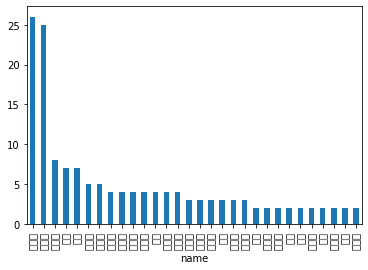

In [33]:
df_individual.groupby('name').count().sort_values('code',ascending=False).head(30)

In [34]:
tmp_var = df_individual.groupby('name').count().sort_values('code',ascending=False).head(30)
data={'x':tmp_var.index,'y':tmp_var['code'].tolist()}
import joblib
joblib.dump(data,'top10.jb')

['top10.jb']

In [52]:
namelist=[]
combinations_name=[]
relation_dict={}
for index,row in df_individual.groupby('code'):
    names = row['name'].tolist()
    namelist+=names
    combinations_name += combinations(sorted(set(names)),2)
relation_dict = Counter(combinations_name)
print(relation_dict)

Counter({('丁碧霞', '李怡名'): 17, ('李志鹤', '李怡名'): 3, ('蔡子跃', '蔡晓东'): 3, ('曹卫宏', '裘成'): 3, ('丁碧霞', '陈晓红'): 2, ('丁碧霞', '张鹏'): 2, ('丁碧霞', '苑志华'): 2, ('张鹏', '李怡名'): 2, ('张鹏', '苑志华'): 2, ('李怡名', '苑志华'): 2, ('郑淑芬', '郑芹珠'): 2, ('丁碧霞', '李志鹤'): 2, ('丁碧霞', '吴海鹰'): 2, ('吴海鹰', '李怡名'): 2, ('丁碧霞', '黄巍然'): 2, ('李怡名', '黄巍然'): 2, ('于宝利', '向银华'): 1, ('于宝利', '周德兰'): 1, ('于宝利', '康义普'): 1, ('于宝利', '康闳博'): 1, ('于宝利', '方微'): 1, ('于宝利', '杨健锋'): 1, ('于宝利', '葛明'): 1, ('于宝利', '邢振华'): 1, ('于宝利', '黄敏春'): 1, ('向银华', '周德兰'): 1, ('向银华', '康义普'): 1, ('向银华', '康闳博'): 1, ('向银华', '方微'): 1, ('向银华', '杨健锋'): 1, ('向银华', '葛明'): 1, ('向银华', '邢振华'): 1, ('向银华', '黄敏春'): 1, ('周德兰', '康义普'): 1, ('周德兰', '康闳博'): 1, ('周德兰', '方微'): 1, ('周德兰', '杨健锋'): 1, ('周德兰', '葛明'): 1, ('周德兰', '邢振华'): 1, ('周德兰', '黄敏春'): 1, ('康义普', '康闳博'): 1, ('康义普', '方微'): 1, ('康义普', '杨健锋'): 1, ('康义普', '葛明'): 1, ('康义普', '邢振华'): 1, ('康义普', '黄敏春'): 1, ('康闳博', '方微'): 1, ('康闳博', '杨健锋'): 1, ('康闳博', '葛明'): 1, ('康闳博', '邢振华'): 1, ('康闳博', '黄敏春'): 1, ('方微', '杨健锋'): 1, ('方微', '葛明'): 1, 

In [53]:
def show_figure(relationDict,namelist_,title):
    edgewidth = []

    for i in relationDict.values():
        edgewidth.append(i)

    plt.figure(figsize=(16,9))
    g = nx.MultiGraph()
    g.add_edges_from(relationDict.keys())
    d = dict(g.degree)

    nx.draw_circular(g,nodelist=d.keys(),
                     node_size=[v*700 for v in d.values()],
                     node_color=range(len(namelist_)),
                     cmap=plt.cm.Paired,
                     with_labels=True,
                     edge_color=range(len(relationDict)),
                     edge_cmap=plt.cm.Dark2,
                     alpha=1.0, width=edgewidth)

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.text(-1.05, 1.05, title, fontsize=12)  # -1，1字体位置
    plt.savefig('tet.png')
    plt.show()

In [25]:
len(namelist)

717

In [24]:
len(relation_dict)

1632

In [44]:
remain_dict ={}
for k,v in relation_dict.items():
    if v>2:
        remain_dict[k]=v

In [61]:
name_list__ = []
for k,v in remain_dict.items():
    name_list__.append(k[0])
    name_list__.append(k[1])

In [32]:
name_list__ = []
for k,v in relation_dict.items():
    name_list__.append(k[0])
    name_list__.append(k[1])

In [62]:
name_list = list(set(name_list__))

In [39]:
len(name_list)

29

In [54]:
namelist_ = list(set(namelist)) 
show_figure(remain_dict,name_list,'test')

NameError: name 'remain_dict' is not defined

In [58]:
kv_result=[]
id=0
for k,v in remain_dict.items():
    d={}
    d['Source']=k[0]
    d['Target']=k[1]
    d['Weight']=v
    kv_result.append(d)
    id+=1
df = pd.DataFrame(kv_result)
df.to_csv('mycsv6.csv',encoding='utf8',index_label=None,index=None)

In [45]:
remain_dict

{('丁碧霞', '李怡名'): 17, ('李志鹤', '李怡名'): 3, ('蔡子跃', '蔡晓东'): 3, ('曹卫宏', '裘成'): 3}

In [65]:
df.head()

,Source,Target,Weight
0,丁碧霞,李志鹤,4
1,丁碧霞,李怡名,17
2,李志鹤,李怡名,5
3,梁小红,郑志坤,3
4,梁小红,翟建琴,3


In [76]:
mask_df = df[df['name'].str.len()<5]

In [77]:
mask_df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债
53,127029,郑淑芬,21.89万,2021-06-30,2.28,2021-09-05 22:36:15.597,中钢转债
73,113612,吕新民,18.62万,2021-06-30,3.58,2021-09-05 22:36:19.893,None
81,128085,王筱慧,11.80万,2021-06-30,1.52,2021-09-05 22:36:22.023,鸿达转债


In [81]:
individual = mask_df['name'].value_counts()
for i in individual.index:
    print(f'{i:3}{individual.loc[i]:4}')

李怡名  25
丁碧霞  22
梁小红  11
郑淑芬   9
高建华   6
翟建琴   6
李志鹤   6
郑志坤   6
陈晓红   6
裘成    5
钟宝申   5
曹卫宏   4
冯玲    4
王胜民   4
吴菊香   4
蔡新宗   3
洪元盛   3
高骏    3
钟原    3
李秀娟   3
张涛    3
蔡晓东   3
郑步翠   3
张鹏    3
王筱慧   3
黄巍然   3
蔡子跃   3
王群    3
阮美娟   2
朱军    2
杜文锐   2
王红喜   2
王峰    2
章才凤   2
张虹    2
肖志章   2
陈圣干   2
刘金茂   2
林巧珠   2
曾毅    2
成康    2
方微    2
汤波    2
殷惠娥   2
蔡彬    2
连志明   2
张小乐   2
张金山   2
郑萍    2
黄永山   2
徐淑珍   2
张咏梅   2
郑芹珠   2
胡幼治   2
祁峰    2
龙梅荣   2
莫浩礼   2
高楠    2
杨永李   2
张群英   2
章瑞新   2
栾国明   2
杨哲    2
#洪健山   2
张学政   1
邓小琴   1
徐光华   1
柯金龙   1
杨梦婷   1
张祖蕾   1
刘效敏   1
齐君华   1
黄德群   1
杨林龙   1
盛况    1
吴丰礼   1
张友胜   1
祝健锋   1
金玉娟   1
白勇波   1
冯丽芳   1
李剑    1
陶静威   1
阮克荣   1
宋安慰   1
陈丹明   1
易德富   1
张锡亮   1
李慧英   1
宋爱国   1
邱钧    1
周炜    1
王益平   1
刘百宽   1
姚成志   1
项光隆   1
华丹宏   1
翁江宏   1
解岩    1
陆海泉   1
陈琪    1
闯小明   1
杨铁柱   1
梁智斌   1
陈东辉   1
郭志彦   1
李剑刚   1
方惠兰   1
蓝洋    1
沈芸珠   1
袁焕玲   1
徐利达   1
解新忠   1
吴水燕   1
蔡建雄   1
林培春   1
李胜德   1
王天贺   1
郑建勋   1
吴源    1
吴春勇   1
邢振华   1
黄敏春   1
方福英   1
毛志勇   1

In [87]:
individual[individual>2].plot()

AttributeError: 'Series' object has no attribute 'bar'

In [88]:
import joblib
joblib.dump(individual,'individual.jb')

['individual.jb']

In [111]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

# 翻转Y轴

data=individual[individual>2]
data=data.sort_values(ascending=False)
X=data.index.tolist()
Y=data.values.tolist()
print(X)
print(Y)

c = (
    Bar()
    .add_xaxis(X)
    .add_yaxis(
        "个人持有转债数目>=3", 
    Y,
    # linestyle_opts=opts.LineStyleOpts(width=1,color='rgb(255, 0, 0)')
    )
    # .reversal_axis()
    # .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="个人持有转债数目"),
    xaxis_opts=opts.AxisOpts(
                                name='名称',
                                min_interval=1,
                                splitline_opts=opts.SplitLineOpts(is_show=True),
                                axislabel_opts=opts.LabelOpts(rotate=45),

                                ),
                                yaxis_opts=opts.AxisOpts(
                                name='个数',
                                # min_interval=5,
                                splitline_opts=opts.SplitLineOpts(is_show=True)
                                ),).set_colors(['green'])
    
).render('bar_demo.html')

['李怡名', '丁碧霞', '梁小红', '郑淑芬', '高建华', '翟建琴', '李志鹤', '郑志坤', '陈晓红', '裘成', '钟宝申', '冯玲', '曹卫宏', '王胜民', '吴菊香', '蔡子跃', '蔡新宗', '洪元盛', '高骏', '钟原', '李秀娟', '张涛', '蔡晓东', '郑步翠', '张鹏', '王筱慧', '黄巍然', '王群']
[25, 22, 11, 9, 6, 6, 6, 6, 6, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [113]:
df[df['name'].str.contains('明汯')]

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
102,113016,上海明汯投资管理有限公司-明汯春晓十期私募证券投资基金,5.44万,2021-06-30,2.27,2021-09-05 22:36:26.365,小康转债
103,113016,上海明汯投资管理有限公司-明汯春晓十一期私募证券投资基金,5.44万,2021-06-30,2.27,2021-09-05 22:36:26.365,小康转债
237,113039,上海明汯投资管理有限公司-明汯春晓十期私募证券投资基金,6.50万,2021-06-30,1.20,2021-09-05 22:36:55.701,嘉泽转债
238,113039,上海明汯投资管理有限公司-明汯春晓十一期私募证券投资基金,6.50万,2021-06-30,1.20,2021-09-05 22:36:55.701,嘉泽转债
632,123012,上海明汯投资管理有限公司-明汯春晓十一期私募证券投资基金,3.30万,2021-06-30,2.56,2021-09-05 22:38:29.793,万顺转债
633,123012,上海明汯投资管理有限公司-明汯春晓十期私募证券投资基金,3.30万,2021-06-30,2.56,2021-09-05 22:38:29.793,万顺转债
637,123012,上海明汯投资管理有限公司-明汯春晓300增强专项1号私募证券投资基金,1.93万,2021-06-30,1.50,2021-09-05 22:38:29.793,万顺转债
639,123012,上海明汯投资管理有限公司-明汯春晓九期私募证券投资基金,1.89万,2021-06-30,1.47,2021-09-05 22:38:29.793,万顺转债
746,123061,上海明汯投资管理有限公司-明汯春晓十一期私募证券投资基金,3.90万,2021-06-30,1.56,2021-09-05 22:38:54.698,航新转债
747,123061,上海明汯投资管理有限公司-明汯春晓十期私募证券投资基金,3.89万,2021-06-30,1.56,2021-09-05 22:38:54.698,航新转债


In [16]:
df.to_excel('十大持有人2022-04-01.xlsx',encoding='utf8')

In [115]:
df.head()

,code,name,amount,update_date,holding_ratio,crawltime,zz_name
0,123102,深圳市平石资产管理有限公司-平石T5q1对冲私募证券投资基金,48.52万,2021-06-30,7.24,2021-09-05 22:36:01.154,华自转债
1,123102,上海宁泉资产管理有限公司-宁泉致远56号私募证券投资基金,33.94万,2021-06-30,5.07,2021-09-05 22:36:01.154,华自转债
2,123102,广州诚信创业投资有限公司,30.00万,2021-06-30,4.48,2021-09-05 22:36:01.154,华自转债
3,123102,钟宝申,21.28万,2021-06-30,3.18,2021-09-05 22:36:01.154,华自转债
4,123102,郑淑芬,19.72万,2021-06-30,2.94,2021-09-05 22:36:01.154,华自转债


In [121]:
df[df['name']=='丁碧霞']['amount_float'].sum()

4306100.0

In [120]:
df[df['name']=='李怡名']['amount']

190     37.44万
213     21.15万
262     16.55万
330     18.63万
395      7.26万
580     28.18万
860     19.01万
911      7.70万
932     11.00万
1078     6.39万
1171    38.14万
1512    25.36万
1550     9.87万
1668    32.75万
1681     9.28万
1709    12.54万
1899     7.67万
1912     3.59万
2065    12.65万
2111    35.76万
2141    46.70万
2402    28.51万
2485     7.93万
3003    67.97万
3508     8.38万
Name: amount, dtype: object

In [136]:
for code,row_df in df.groupby('code'):
    if len(row_df[row_df['name'].isin(['李怡名'])])>0 and len(row_df[row_df['name'].isin(['丁碧霞'])])>0:
        print(row_df['zz_name'].iloc[0])


华钰转债
奇精转债
三星转债
新星转债
岱勒转债
今天转债
思特转债
银信转债
斯莱转债
金诺转债
明电转债
威唐转债
金陵转债
海印转债
迪龙转债
江银转债
华锋转债


In [137]:
count

17